<a href="https://colab.research.google.com/github/ashi31pandey/super-garbanzo/blob/main/data_supersotre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [5]:
import zipfile
import os

zip_path ="archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("superstore_data")
os.listdir("superstore_data")

['Sample - Superstore.csv']

In [8]:
import pandas as pd

df=pd.read_csv("superstore_data/Sample - Superstore.csv",encoding='latin1')
df.head();

In [16]:
df.info()
df.describe()
#df.isnull().sum()
#df.duplicated().sum()
#df=df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


total sales 2297200.8603000003
total profit 286397.0217
total Quantity 37873


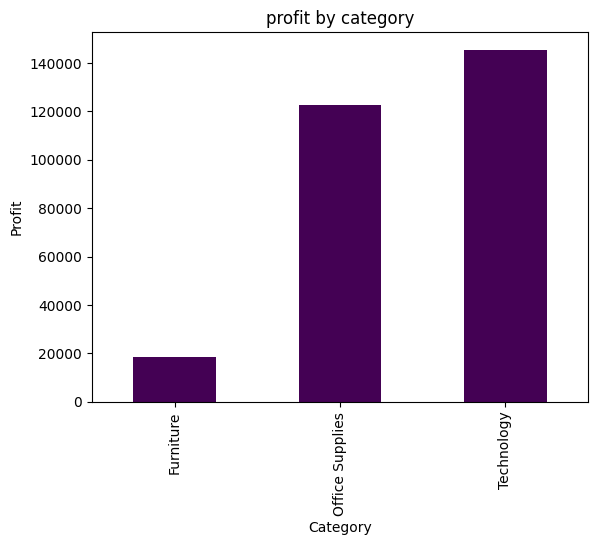

In [21]:
import matplotlib.pyplot as plt

print("total sales", df['Sales'].sum())
print("total profit", df['Profit'].sum())
print("total Quantity", df['Quantity'].sum())
df.groupby('Category')['Profit'].sum().plot(kind='bar', title='profit by category', colormap='viridis')
plt.ylabel('Profit')
plt.show()


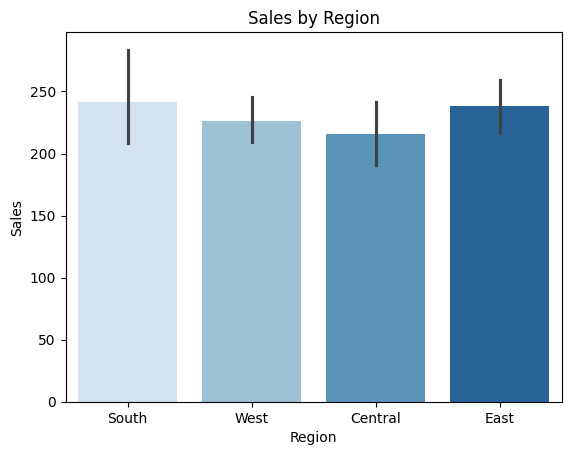

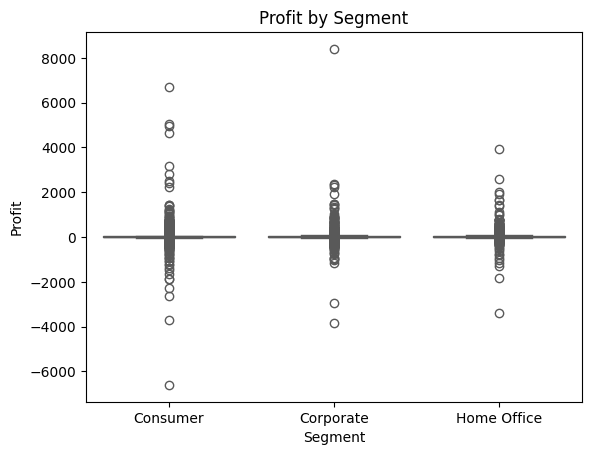

In [25]:
import seaborn as sns
sns.barplot(data=df, x='Region',y='Sales', palette='Blues')
plt.title("Sales by Region")
plt.show()

sns.boxplot(data=df, x='Segment', y='Profit', palette='Set2')
plt.title("Profit by Segment")
plt.show()

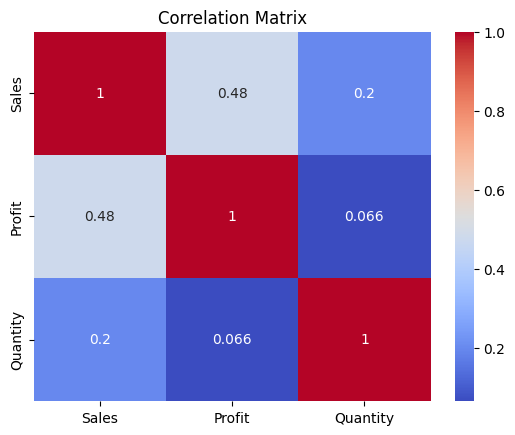

In [26]:
corr = df[['Sales','Profit','Quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#key insight
Technology category contributes the highest profit.
South region has moderate correlated with Profit.
Discount is negative correlated with Profit.
Office Supplies have high sales but lower profitability.